<a href="https://colab.research.google.com/github/zainamri/Kelompok-3-/blob/main/Telcoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# URL raw file GitHub
url = "https://raw.githubusercontent.com/arubhasy/dataset/main/Telco-Customer-Churn.csv"

# Membaca dataset
df = pd.read_csv(url)

# Menampilkan 5 baris pertama
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


menelaah data

In [85]:
print("--- Analisis Tipe Data ---")
df.info()

--- Analisis Tipe Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

In [86]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7040.000000,7043.000000
mean,0.162147,35.043892,64.761692
std,0.368612,115.282871,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,7100.000000,118.750000


In [87]:
# Jumlah nilai unik per kolom
print("\n=== Nilai Unik per Kolom ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} nilai unik")


=== Nilai Unik per Kolom ===
customerID: 7043 nilai unik
gender: 4 nilai unik
SeniorCitizen: 2 nilai unik
Partner: 2 nilai unik
Dependents: 2 nilai unik
tenure: 78 nilai unik
PhoneService: 2 nilai unik
MultipleLines: 3 nilai unik
InternetService: 3 nilai unik
OnlineSecurity: 3 nilai unik
OnlineBackup: 3 nilai unik
DeviceProtection: 3 nilai unik
TechSupport: 3 nilai unik
StreamingTV: 3 nilai unik
StreamingMovies: 3 nilai unik
Contract: 3 nilai unik
PaperlessBilling: 2 nilai unik
PaymentMethod: 4 nilai unik
MonthlyCharges: 1585 nilai unik
TotalCharges: 6531 nilai unik
Churn: 2 nilai unik


validasi

In [88]:
print("Pengecekan Data Duplikat:")
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")

Pengecekan Data Duplikat:
Jumlah baris duplikat: 0


In [89]:
print("Pengecekan Nilai Hilang Awal:")
print(df.isnull().sum())

Pengecekan Nilai Hilang Awal:
customerID          0
gender              5
SeniorCitizen       0
Partner             0
Dependents          0
tenure              3
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


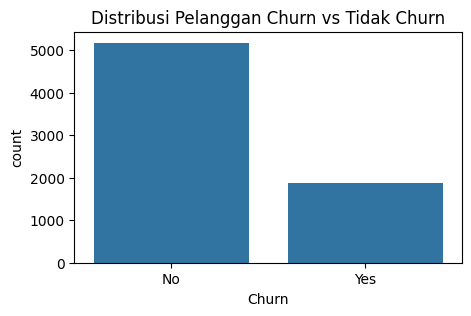

In [90]:
# Distribusi Variabel Target 'Churn'
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Churn')
plt.title('Distribusi Pelanggan Churn vs Tidak Churn')
plt.show()

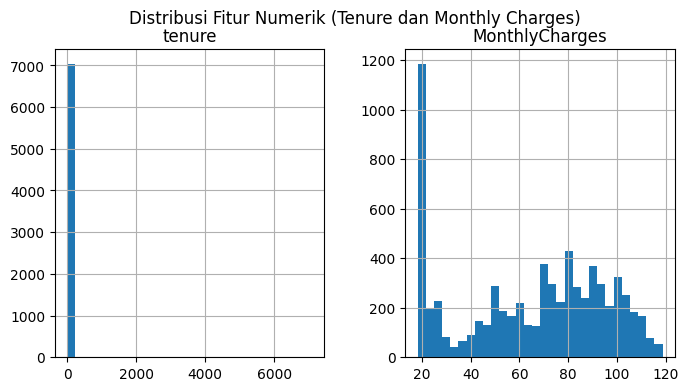

In [91]:
# Distribusi untuk beberapa fitur numerik penting
numerical_features = ['tenure', 'MonthlyCharges']
df[numerical_features].hist(bins=30, figsize=(8, 4))
plt.suptitle('Distribusi Fitur Numerik (Tenure dan Monthly Charges)')
plt.show()

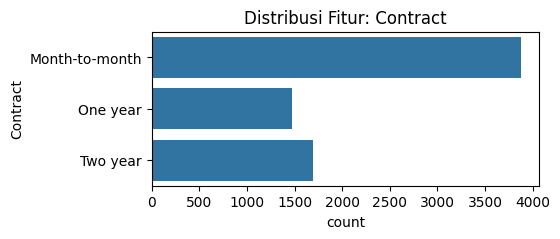

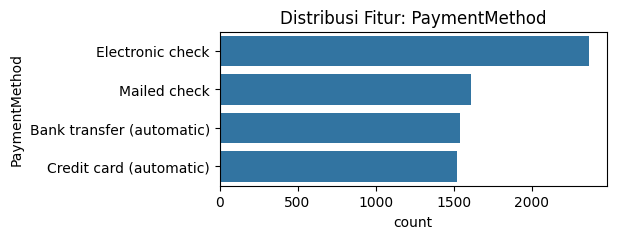

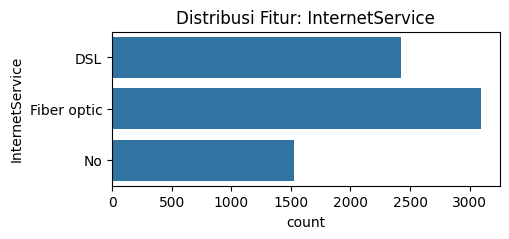

In [92]:
# Distribusi untuk beberapa fitur kategorikal penting
categorical_features = ['Contract', 'PaymentMethod', 'InternetService']
for col in categorical_features:
    plt.figure(figsize=(5, 2))
    sns.countplot(data=df, y=col)
    plt.title(f'Distribusi Fitur: {col}')
    plt.show()

korelasi

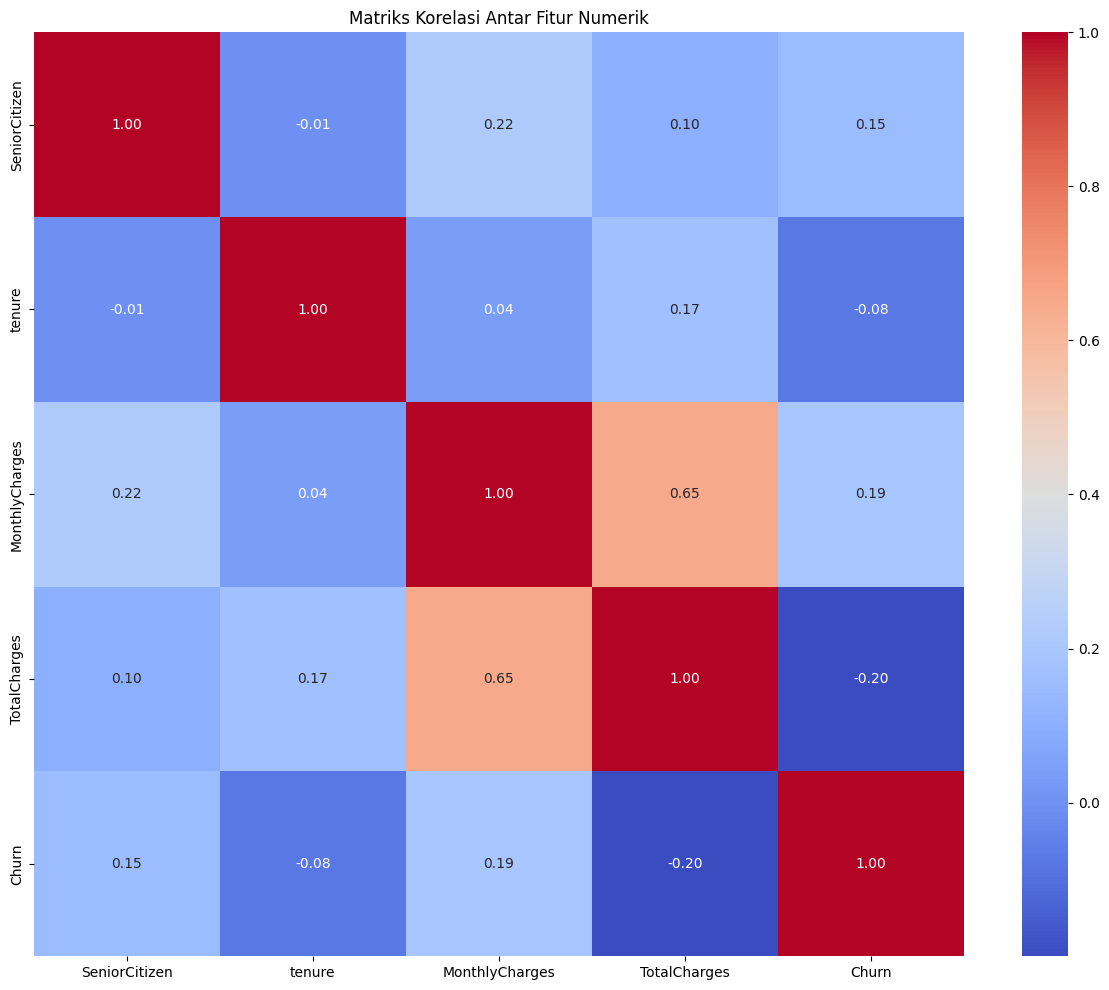

In [93]:
# Membuat salinan dataframe untuk analisis korelasi
# Membuat salinan dataframe untuk analisis korelasi
df_corr = df.copy()
df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')
df_corr['Churn'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})
numerical_cols_for_corr = df_corr.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 12))
sns.heatmap(df_corr[numerical_cols_for_corr].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()


outlier cek

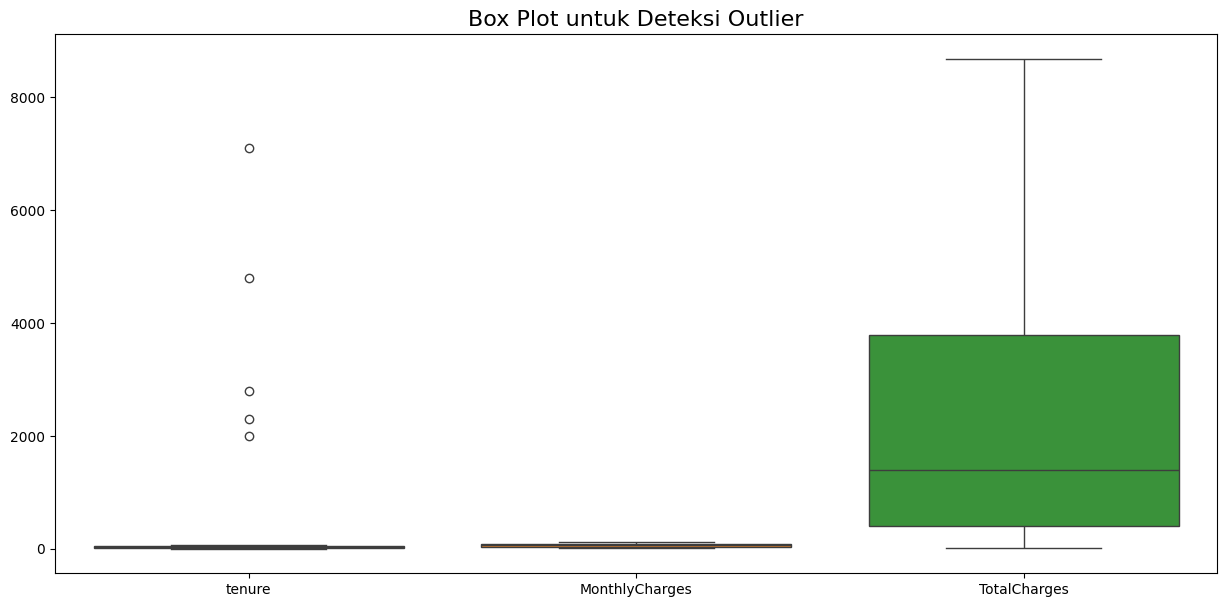

In [94]:
# Tentukan kolom numerik yang akan diperiksa (termasuk TotalCharges setelah diperbaiki)
kolom_numerik_cek = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Buat dataframe sementara hanya untuk pengecekan outlier
df_cek_outlier = df.copy()
df_cek_outlier['TotalCharges'] = pd.to_numeric(df_cek_outlier['TotalCharges'], errors='coerce')
df_cek_outlier.dropna(inplace=True)

plt.figure(figsize=(15, 7))
sns.boxplot(data=df_cek_outlier[kolom_numerik_cek])
plt.title('Box Plot untuk Deteksi Outlier', fontsize=16)
plt.show()

PEMBERSIHAN DAN PERSIAPAN DATA (PREPROCESSING)

In [95]:
# Menghapus kolom customerID yang tidak relevan
df.drop('customerID', axis=1, inplace=True)

In [96]:
# Memperbaiki kolom 'TotalCharges' yang seharusnya numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Jumlah nilai hilang di 'TotalCharges' setelah konversi: {df['TotalCharges'].isnull().sum()}")
df.dropna(inplace=True)

Jumlah nilai hilang di 'TotalCharges' setelah konversi: 11


In [97]:
# Menghapus baris yang memiliki data hilang (NaN)
df.dropna(inplace=True)

In [98]:
# Jika ada outlier yang perlu ditangani, kodenya akan seperti ini:
# for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df[col] = np.clip(df[col], lower_bound, upper_bound)
# print("Outlier telah ditangani (jika ada).")

pelabelan target dan konstruksi fitur

In [99]:
# Mengubah kolom target 'Churn' dari 'Yes'/'No' menjadi 1/0
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [100]:
# Mengubah semua sisa kolom kategorikal menjadi numerik menggunakan One-Hot Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [101]:
print("Pembersihan dan transformasi data selesai.")
print(f"Bentuk data setelah diolah: {df.shape[0]} baris, {df.shape[1]} kolom.")

Pembersihan dan transformasi data selesai.
Bentuk data setelah diolah: 7025 baris, 33 kolom.


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7025 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7025 non-null   int64  
 1   tenure                                 7025 non-null   float64
 2   MonthlyCharges                         7025 non-null   float64
 3   TotalCharges                           7025 non-null   float64
 4   Churn                                  7025 non-null   int64  
 5   gender_Female                          7025 non-null   bool   
 6   gender_M                               7025 non-null   bool   
 7   gender_Male                            7025 non-null   bool   
 8   Partner_Yes                            7025 non-null   bool   
 9   Dependents_Yes                         7025 non-null   bool   
 10  PhoneService_Yes                       7025 non-null   bool   
 11  MultipleL

In [103]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000
mean,0.162420,35.107616,64.783573,2283.251964,0.265907
std,0.368862,115.396389,30.077709,2266.970388,0.441847
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.550000,401.300000,0.000000
50%,0.000000,29.000000,70.350000,1396.900000,0.000000
75%,0.000000,56.000000,89.850000,3794.500000,1.000000
max,1.000000,7100.000000,118.750000,8684.800000,1.000000


misahin data

In [104]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']
# Membagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData telah dibagi menjadi {X_train.shape[0]} data train (latih) dan {X_test.shape[0]} data test (uji).")


Data telah dibagi menjadi 5620 data train (latih) dan 1405 data test (uji).


Bangun dan Latih Model :)



In [105]:
# Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
print("Model Decision Tree berhasil dilatih.")

# LightGBM
model_lgbm = LGBMClassifier(random_state=42)
model_lgbm.fit(X_train, y_train)
print("Model LightGBM berhasil dilatih.")

# Random Forest
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)
model_rf.fit(X_train, y_train)
print("Model Random Forest berhasil dilatih.")

Model Decision Tree berhasil dilatih.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1494, number of negative: 4126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 5620, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265836 -> initscore=-1.015851
[LightGBM] [Info] Start training from score -1.015851
Model LightGBM berhasil dilatih.
Model Random Forest berhasil dilatih.


In [107]:
# Metrik kesuksesan yang ditentukan
target_accuracy = 0.70

MODEL 1: DECISION TREE
Akurasi: 71.81%
Status: Target akurasi TERPENUHI.
Laporan Klasifikasi:
               precision    recall  f1-score   support

 Tidak Churn       0.82      0.79      0.80      1031
       Churn       0.47      0.53      0.50       374

    accuracy                           0.72      1405
   macro avg       0.65      0.66      0.65      1405
weighted avg       0.73      0.72      0.72      1405



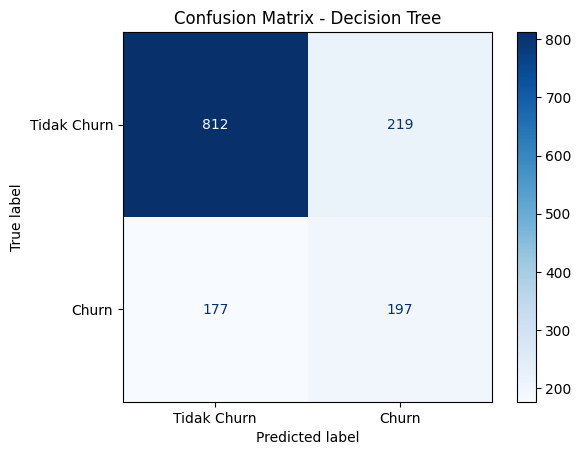

In [108]:
# Evaluasi Model 1: Decision Tree
print("MODEL 1: DECISION TREE")
y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi: {accuracy_dt:.2%}")

if accuracy_dt > target_accuracy: print("Status: Target akurasi TERPENUHI.")
else: print("Status: Target akurasi TIDAK TERPENUHI.")
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_dt, target_names=['Tidak Churn', 'Churn']))

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Tidak Churn', 'Churn']).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

MODEL 2: LIGHTGBM 
Akurasi: 79.43%
Status: Target akurasi TERPENUHI.
Laporan Klasifikasi:
               precision    recall  f1-score   support

 Tidak Churn       0.85      0.88      0.86      1031
       Churn       0.63      0.56      0.59       374

    accuracy                           0.79      1405
   macro avg       0.74      0.72      0.73      1405
weighted avg       0.79      0.79      0.79      1405



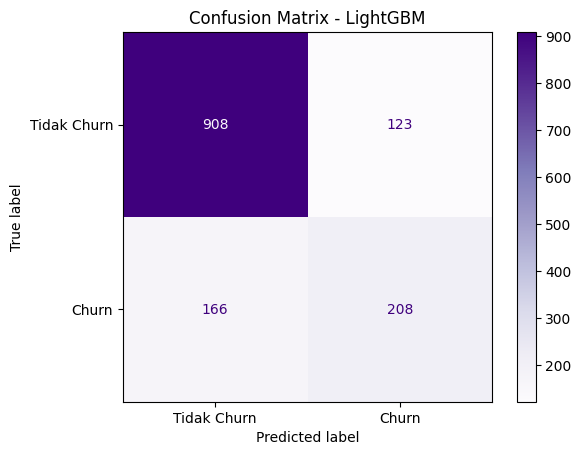

In [110]:
# Evaluasi Model 2: LightGBM
print("MODEL 2: LIGHTGBM ")
y_pred_lgbm = model_lgbm.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Akurasi: {accuracy_lgbm:.2%}")

if accuracy_lgbm > target_accuracy: print("Status: Target akurasi TERPENUHI.")
else: print("Status: Target akurasi TIDAK TERPENUHI.")
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_lgbm, target_names=['Tidak Churn', 'Churn']))

cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
disp_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm, display_labels=['Tidak Churn', 'Churn']).plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix - LightGBM")
plt.show()

MODEL 2: RANDOM FOREST 
Akurasi: 78.86%
Status: Target akurasi TERPENUHI.

Laporan Klasifikasi:
              precision    recall  f1-score   support

 Tidak Churn       0.83      0.90      0.86      1031
       Churn       0.64      0.48      0.55       374

    accuracy                           0.79      1405
   macro avg       0.73      0.69      0.70      1405
weighted avg       0.78      0.79      0.78      1405


Confusion Matrix:


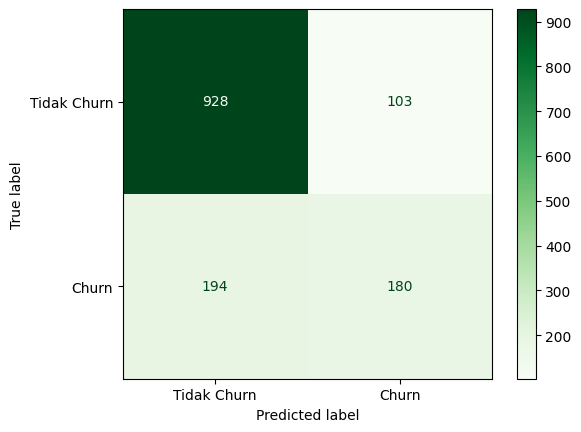

In [111]:
# --- Evaluasi Model Random Forest ---
print("MODEL 2: RANDOM FOREST ")
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi: {accuracy_rf:.2%}")
if accuracy_rf > target_accuracy:
    print("Status: Target akurasi TERPENUHI.")
else:
    print("Status: Target akurasi TIDAK TERPENUHI.")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf, target_names=['Tidak Churn', 'Churn']))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Tidak Churn', 'Churn'])
disp_rf.plot(cmap=plt.cm.Greens)
plt.show()


Interpretasi Fitur dari Model Terbaik (LightGBM) 


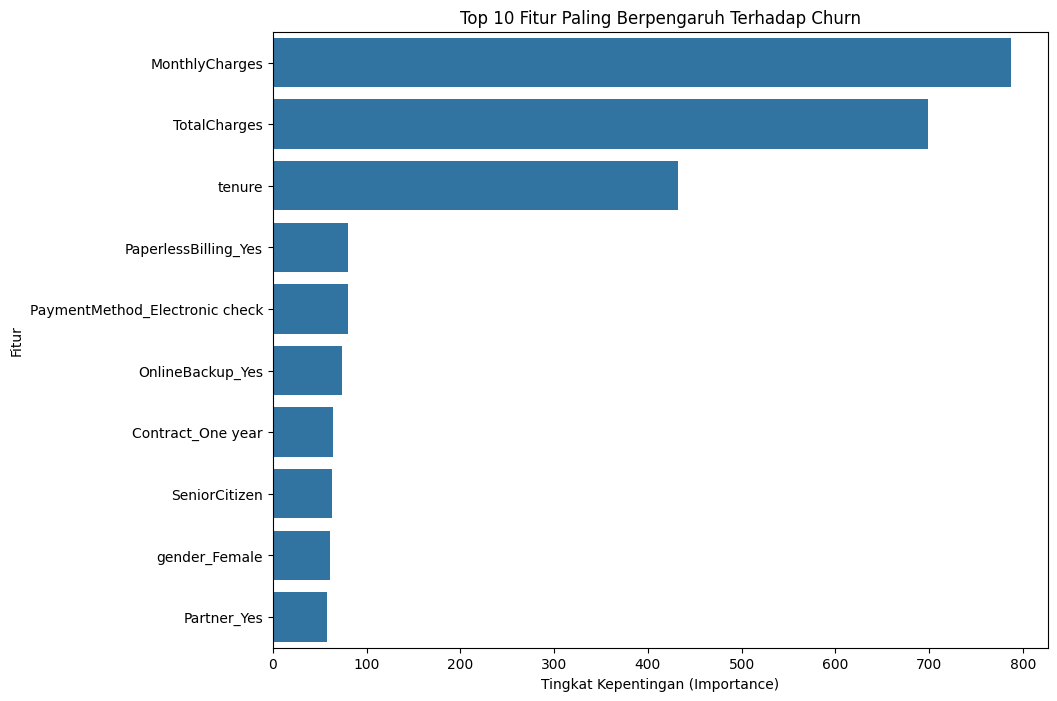

In [112]:
print("Interpretasi Fitur dari Model Terbaik (LightGBM) ")
importances = pd.Series(model_lgbm.feature_importances_, index=X.columns)
top_10_features = importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_features, y=top_10_features.index)
plt.title('Top 10 Fitur Paling Berpengaruh Terhadap Churn')
plt.xlabel('Tingkat Kepentingan (Importance)')
plt.ylabel('Fitur')
plt.show()